In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

%matplotlib inline

pd.set_option("display.max_columns", None)

# for SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn import metrics

In [21]:
df = pd.read_csv('Pfizer_11-5-21.csv', converters={'POS_LEVEL1': lambda x: str(x), 'POS_LEVEL2':lambda x: str(x),
                                          'POS_LEVEL3': lambda x: str(x), 'POS_LEVEL4': lambda x: str(x),
                                          'POS_LEVEL5': lambda x: str(x)})

/Users/atsukosakurai/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,14,25,26,27,28,29,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
df.head()

,RandomID,POS_LEVEL1,POS_LEVEL2,POS_LEVEL3,POS_LEVEL4,POS_LEVEL5,POSITIONLVL,DEPARTMENT,DEPTCD,RPTG_DIV_MAPPING,REGION,COUNTRY,LOCATION,JOB_FUNCTION,JOBSUBFUNCTION,LGTHOFSVC,TIMEINJOB,TIMEINPOSITION,COMPARATIO,GLBLDEPTLVL03,GLBLDEPTLVL04,GLBLDEPTLVL05,GLBLDEPTLVL06,Month_Year,CALYRMO,CATEGORY,VOL_INVOL,ACTIONDT,ACTION,ACTIONCD,REASON,RSNCD,Status,Country.Level.Manufacturing,Country.Level.Sales,Country.Level.R.D,Country.Level.Finance,Country.Level.Legal,Country.Level.HR,Country.Level.IT,Country.Level.Pharma.Other,Country.Level.Cost.of.Living.Index,Country.Level.Traffic.Index,Country.Level.Time.Index..in.minutes.,Country.Level.Time.Ex.Index,Country.Level.Inefficiencies.Index,Country.Level.Unemployment.Rate....,Country.Level.Corruption.Perception.Index,Country.Level.Inflation....,Country.Level.GDP..nominal...in.USD.billion.,Country.Level.Pharma.Industry.Growth,Country.Level.Labor.Market.Risk.Index.Score,Country.Level.Political.Risk.Index.Score,Country.Level.Power.distance,Country.Level.Individualism,Country.Level.Masculinity,Country.Level.Uncertainty.avoidance,Country.Level.Long.term.orientation,Country.Level.Indulgence,COMPARATIO_IMPUTED,demand_press
0,119341,00026264,10152554,10158817,10645908,10708518,5.0,Corporate Tax,800399,Global Operations,North America,United States,Peapack New Jersey,Global Operations,Global Operations,29.555099,2.587269,2.587269,1.190823,Finance & Business Ops,Finance,Corporate Tax,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,77.141081,181.42619,39.171905,2043.656667,208.704286,0.0436,74.0,0.021,19485.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.183788
1,134992,00026264,00047530,10551332,11241036,10233655,7.0,GSCPM,800390,Pfizer Global Supply,North America,United States,Pleasant Prairie W3 - Hospira,Engineering,Engineering Maintenance,26.948665,0.577687,0.577687,1.278710,GSCPM,NaN,NaN,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,77.141081,181.42619,39.171905,2043.656667,208.704286,0.0436,74.0,0.021,19485.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.193002
2,78068,00026264,00047530,10551332,11241036,11240229,7.0,Pfizer Global Supply,800066,Pfizer Global Supply,North America,United States,Peapack New Jersey,Logistics & Supply Chain Mgmt,Supply Chain Functions,14.069815,0.060233,0.060233,0.974331,NaN,NaN,NaN,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,77.141081,181.42619,39.171905,2043.656667,208.704286,0.0436,74.0,0.021,19485.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.193002
3,146210,00026264,10551122,10608626,10140857,00132102,8.0,PSSM Drug Product Supply,803386,Worldwide Research & Development,North America,United States,"Groton, Connecticut",Logistics & Supply Chain Mgmt,Logistics & Supply Chain Mgmt,14.088980,3.835729,3.835729,1.113577,Medicinal Sciences,Pharm Sci Small Molecule,PSSM Drug Product Supply,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,77.141081,181.42619,39.171905,2043.656667,208.704286,0.0436,74.0,0.021,19485.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.140796
4,14471,00026264,10655662,11269189,10655733,10261243,6.0,GEP Germany,802585,Pfizer Essential Health (PEH),Europe,Germany,Berlin,Marketing and Market Research,Product Mgmt/Brand Marketing,12.501027,6.053388,7.835729,1.060864,GEP - Europe,GEP Germany,NaN,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.173282,0.177543,0.126411,0.156238,0.149136,0.160499,0.167600,0.175368,67.616667,96.49500,33.000000,321.450000,112.645000,0.0375,81.0,0.017,3700.613,0.048928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.177543


In [23]:
pd.set_option("display.max_rows", None)
df.isnull().sum()

RandomID                                              0
POS_LEVEL1                                            0
POS_LEVEL2                                            0
POS_LEVEL3                                            0
POS_LEVEL4                                            0
POS_LEVEL5                                            0
POSITIONLVL                                        5935
DEPARTMENT                                         1633
DEPTCD                                               25
RPTG_DIV_MAPPING                                      0
REGION                                                0
COUNTRY                                               0
LOCATION                                              0
JOB_FUNCTION                                          0
JOBSUBFUNCTION                                    96378
LGTHOFSVC                                         12504
TIMEINJOB                                          5577
TIMEINPOSITION                                  

In [4]:
df.shape

(4723161, 61)

In [5]:
df.columns

Index(['RandomID', 'POS_LEVEL1', 'POS_LEVEL2', 'POS_LEVEL3', 'POS_LEVEL4',
       'POS_LEVEL5', 'POSITIONLVL', 'DEPARTMENT', 'DEPTCD', 'RPTG_DIV_MAPPING',
       'REGION', 'COUNTRY', 'LOCATION', 'JOB_FUNCTION', 'JOBSUBFUNCTION',
       'LGTHOFSVC', 'TIMEINJOB', 'TIMEINPOSITION', 'COMPARATIO',
       'GLBLDEPTLVL03', 'GLBLDEPTLVL04', 'GLBLDEPTLVL05', 'GLBLDEPTLVL06',
       'Month_Year', 'CALYRMO', 'CATEGORY', 'VOL_INVOL', 'ACTIONDT', 'ACTION',
       'ACTIONCD', 'REASON', 'RSNCD', 'Status', 'Country.Level.Manufacturing',
       'Country.Level.Sales', 'Country.Level.R.D', 'Country.Level.Finance',
       'Country.Level.Legal', 'Country.Level.HR', 'Country.Level.IT',
       'Country.Level.Pharma.Other', 'Country.Level.Cost.of.Living.Index',
       'Country.Level.Traffic.Index', 'Country.Level.Time.Index..in.minutes.',
       'Country.Level.Time.Ex.Index', 'Country.Level.Inefficiencies.Index',
       'Country.Level.Unemployment.Rate....',
       'Country.Level.Corruption.Perception.Index',

In [6]:
df = df.drop(columns=['CALYRMO', 'CATEGORY', 'VOL_INVOL', 'ACTIONDT', 'ACTION', 'ACTIONCD', 'REASON', 'RSNCD',
                     'Country.Level.Manufacturing',
       'Country.Level.Sales', 'Country.Level.R.D', 'Country.Level.Finance',
       'Country.Level.Legal', 'Country.Level.HR', 'Country.Level.IT',
       'Country.Level.Pharma.Other'])

In [7]:
df = df.dropna()

In [8]:
df.shape

(279505, 45)

In [10]:
chosen_vars = [
       'POSITIONLVL',
       'LGTHOFSVC', 'TIMEINJOB', 'TIMEINPOSITION', 'COMPARATIO',
       'Status', 'Country.Level.Cost.of.Living.Index',
       'Country.Level.Traffic.Index', 'Country.Level.Time.Index..in.minutes.',
       'Country.Level.Time.Ex.Index', 'Country.Level.Inefficiencies.Index',
       'Country.Level.Unemployment.Rate....',
       'Country.Level.Corruption.Perception.Index',
       'Country.Level.Inflation....',
       'Country.Level.GDP..nominal...in.USD.billion.',
       'Country.Level.Pharma.Industry.Growth',
       'Country.Level.Labor.Market.Risk.Index.Score',
       'Country.Level.Political.Risk.Index.Score',
       'Country.Level.Power.distance', 'Country.Level.Individualism',
       'Country.Level.Masculinity', 'Country.Level.Uncertainty.avoidance',
       'Country.Level.Long.term.orientation', 'Country.Level.Indulgence',
       'COMPARATIO_IMPUTED', 'demand_press']


In [11]:
X = df[chosen_vars]
y = df['Status']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn import svm

In [14]:
model = svm.SVC()

model.fit(X_train, y_train)

SVC()

In [15]:
accuracy = model.score(X_test, y_test)
print('Accuracy', accuracy)

Accuracy 0.9994275594354305


In [16]:
y_pred = model.predict(X_test)

In [17]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55869
           1       0.00      0.00      0.00        32

    accuracy                           1.00     55901
   macro avg       0.50      0.50      0.50     55901
weighted avg       1.00      1.00      1.00     55901



/Users/atsukosakurai/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


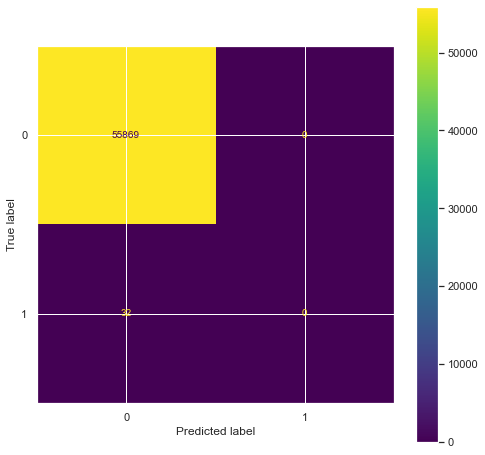

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
metrics.plot_confusion_matrix(estimator=model, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax)